In [1]:
import re
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df = pd.read_csv('kiva_loans_20181016.csv')
df.head(300)

id    date                   activity          sector  \
0     653051  1/1/14        Fruits & Vegetables            Food   
1     653053  1/1/14                   Rickshaw  Transportation   
2     653068  1/1/14             Transportation  Transportation   
3     653063  1/1/14                 Embroidery            Arts   
4     653084  1/1/14                 Milk Sales            Food   
5    1080148  1/1/14                   Services        Services   
6     653067  1/1/14                      Dairy     Agriculture   
7     653078  1/1/14               Beauty Salon        Services   
8     653082  1/1/14              Manufacturing   Manufacturing   
9     653048  1/1/14      Food Production/Sales            Food   
10    653060  1/1/14                   Rickshaw  Transportation   
11    653088  1/1/14                  Wholesale       Wholesale   
12    653089  1/1/14              General Store          Retail   
13    653062  1/1/14             Clothing Sales        Clothing   
14    653075  1/1/14                    Poultry     Agriculture   
15    653054  1/1/14                   Rickshaw  Transportation   
16    653091  1/1/14              General Store          Retail   
17    653052  1/1/14                  Tailoring        Services   
18    653066  1/1/14                     Sewing        Services   
19    653080  1/1/14               Beauty Salon        Services   
20    653065  1/1/14                     Bakery            Food   
21    653055  1/1/14                 Restaurant            Food   
22    653050  1/1/14             Clothing Sales        Clothing   
23    653079  1/1/14                 Embroidery            Arts   
24    653061  1/1/14                 Food Stall            Food   
25    653074  1/1/14                    Farming     Agriculture   
26    653069  1/1/14      Construction Supplies    Construction   
27    653056  1/1/14                   Rickshaw  Transportation   
28    653071  1/1/14                    Farming     Agriculture   
29    653073  1/1/14                    Farming     Agriculture   
..       ...     ...                        ...             ...   
270   653331  1/2/14                Food Market            Food   
271   653109  1/2/14              General Store          Retail   
272   653357  1/2/14              Grocery Store            Food   
273   653412  1/2/14             Clothing Sales        Clothing   
274   653316  1/2/14                   Clothing        Clothing   
275   653214  1/2/14               Beauty Salon        Services   
276   653137  1/2/14                       Pigs     Agriculture   
277   653361  1/2/14                 Metal Shop   Manufacturing   
278   653317  1/2/14                       Food            Food   
279   653251  1/2/14               Beauty Salon        Services   
280   653096  1/2/14      Food Production/Sales            Food   
281   653133  1/2/14                    Farming     Agriculture   
282   653157  1/2/14                       Food            Food   
283   653182  1/2/14               Construction    Construction   
284   653141  1/2/14                    Vehicle    Personal Use   
285   653318  1/2/14              General Store          Retail   
286   653187  1/2/14             Clothing Sales        Clothing   
287   653420  1/2/14                Agriculture     Agriculture   
288   653289  1/2/14                      Dairy     Agriculture   
289   653220  1/2/14               Butcher Shop            Food   
290   653147  1/2/14                  Tailoring        Services   
291   653201  1/2/14               Beauty Salon        Services   
292   653398  1/2/14             Clothing Sales        Clothing   
293   653230  1/2/14                    Poultry     Agriculture   
294   653387  1/2/14              Grocery Store            Food   
295   653130  1/2/14               Butcher Shop            Food   
296   653404  1/2/14              Grocery Store            Food   
297   653416  1/2/14                     Retail          

In [3]:
df.shape

(671205, 18)

In [4]:
df.status.value_counts()

1    622877
0     48328
Name: status, dtype: int64

In [5]:
df.dtypes

id                     int64
date                  object
activity              object
sector                object
use                   object
funded_amount          int64
loan_amount            int64
diff_funded_loan       int64
status                 int64
country_code          object
country               object
currency              object
gender                object
borrower_genders      object
lender_count           int64
term_in_months         int64
repayment_interval    object
tags                  object
dtype: object

In [6]:
df.isnull().sum()

id                         0
date                       0
activity                   0
sector                     0
use                     4232
funded_amount              0
loan_amount                0
diff_funded_loan           0
status                     0
country_code               8
country                    0
currency                   0
gender                  4221
borrower_genders        4221
lender_count               0
term_in_months             0
repayment_interval         0
tags                  171416
dtype: int64

# 1. Replacing Coefficients of Categorical Features based on Regressgion Model
(Categorical Feature 1 - Activity)
This is done because the observed p-value of features was quite high implying a very low significance level of the features for the regression model. This method could improve the significance of features in model and accuracy.

In [7]:
df_activity = df[['status', 'activity']]
df_activity = df_activity.dropna()

df_activity = pd.get_dummies(df_activity)
df_activity.head()

## Creating X and Y for regression model and calculating coefficients
X = df_activity.drop(['status'], axis=1)
y = df_activity['status']

lm = LogisticRegression()
lm.fit(X,y)
params = np.append(lm.intercept_,lm.coef_)
predictions = lm.predict(X)

params = np.round(params,4)

myDF1 = pd.DataFrame()
index = [0]
params = np.delete(params, index)

myDF1["Activity_Feature_Name"],myDF1["Activity_Coefficients"] = [X.columns,params]
print(myDF1)

## Replacing/appending the coefficients in the original dataset
keys = [i.replace('activity_', '') for i in df_activity.columns[1:]]
activity_features = dict(zip(keys, myDF1.Activity_Coefficients.values))

activity_coef = [activity_features[i] for i in df.activity.values]
df['activity_coef'] = activity_coef
df

/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


             Activity_Feature_Name  Activity_Coefficients
0              activity_Adult Care                 0.0798
1             activity_Agriculture                -0.5987
2        activity_Air Conditioning                -0.0285
3            activity_Animal Sales                -0.2070
4             activity_Aquaculture                -0.5387
5                    activity_Arts                 0.5732
6             activity_Auto Repair                -1.1636
7                  activity_Bakery                -0.0646
8            activity_Balut-Making                 1.1045
9             activity_Barber Shop                -0.9150
10           activity_Beauty Salon                -0.6690
11             activity_Beekeeping                -0.0949
12              activity_Beverages                -0.6162
13         activity_Bicycle Repair                 1.6725
14          activity_Bicycle Sales                 1.0377
15             activity_Blacksmith                 1.6599
16            

id     date               activity          sector  \
0        653051   1/1/14    Fruits & Vegetables            Food   
1        653053   1/1/14               Rickshaw  Transportation   
2        653068   1/1/14         Transportation  Transportation   
3        653063   1/1/14             Embroidery            Arts   
4        653084   1/1/14             Milk Sales            Food   
5       1080148   1/1/14               Services        Services   
6        653067   1/1/14                  Dairy     Agriculture   
7        653078   1/1/14           Beauty Salon        Services   
8        653082   1/1/14          Manufacturing   Manufacturing   
9        653048   1/1/14  Food Production/Sales            Food   
10       653060   1/1/14               Rickshaw  Transportation   
11       653088   1/1/14              Wholesale       Wholesale   
12       653089   1/1/14          General Store          Retail   
13       653062   1/1/14         Clothing Sales        Clothing   
14       653075   1/1/14                Poultry     Agriculture   
15       653054   1/1/14               Rickshaw  Transportation   
16       653091   1/1/14          General Store          Retail   
17       653052   1/1/14              Tailoring        Services   
18       653066   1/1/14                 Sewing        Services   
19       653080   1/1/14           Beauty Salon        Services   
20       653065   1/1/14                 Bakery            Food   
21       653055   1/1/14             Restaurant            Food   
22       653050   1/1/14         Clothing Sales        Clothing   
23       653079   1/1/14             Embroidery            Arts   
24       653061   1/1/14             Food Stall            Food   
25       653074   1/1/14                Farming     Agriculture   
26       653069   1/1/14  Construction Supplies    Construction   
27       653056   1/1/14               Rickshaw  Transportation   
28       653071   1/1/14                Farming     Agriculture   
29       653073   1/1/14                Farming     Agriculture   
...         ...      ...                    ...             ...   
671175  1340274  7/21/17              Livestock     Agriculture   
671176  1340259  7/21/17              Livestock     Agriculture   
671177  1340279  7/22/17              Livestock     Agriculture   
671178  1340280  7/22/17              Livestock     Agriculture   
671179  1340282  7/22/17              Livestock     Agriculture   
671180  1340286  7/23/17              Livestock     Agriculture   
671181  1340285  7/23/17              Livestock     Agriculture   
671182  1340292  7/23/17              Livestock     Agriculture   
671183  1340290  7/23/17              Livestock     Agriculture   
671184  1340287  7/23/17              Livestock     Agriculture   
671185  1340298  7/24/17              Livestock     Agriculture   
671186  1340300  7/24/17              Livestock     Agriculture   
671187  1340297  7/24/17              Livestock     Agriculture   
671188  1340302  7/24/17              Livestock     Agriculture   
671189  1340315  7/25/17              Livestock     Agriculture   
671190  1340321  7/25/17              Livestock     Agriculture   
671191  1340327  7/25/17              Livestock     Agriculture   
671192  1340328  7/25/17              Livestock     Agriculture   
671193  1340333  7/25/17              Livestock     Agriculture   
671194  1340332  7/25/17              Livestock     Agriculture   
671195  1340329  7/25/17              Livestock     Agriculture   
671196  1340325  7/25/17              Livestock     Agriculture   
671197  1340330  7/25/17              Livestock     Agriculture   
671198  1340331  7/25/17              Livestock     Agriculture   
671199  1340318  7/25/17              Livestock     Agriculture   
671200  1340323  7/25/17              Livestock     Agriculture   
671201  1340316  7/25/17              Livestock     Agriculture   
671202  1340334  7/26/17                  Games   Entertainm

# 2. Replacing Coefficients of Categorical Features based on Regressgion Model
(Categorical Feature 2 - Sector)

In [8]:
df_sector = df[['status', 'sector']]
df_sector = df_sector.dropna()

df_sector = pd.get_dummies(df_sector)
print (df_sector.head())
print (df_sector.shape)

## Creating X and Y for regression model and calculating coefficients
X = df_sector.drop(['status'], axis=1)
y = df_sector['status']

lm = LogisticRegression()
lm.fit(X,y)
params = np.append(lm.intercept_,lm.coef_)
predictions = lm.predict(X)

params = np.round(params,4)

myDF2 = pd.DataFrame()
index = [0]
params = np.delete(params, index)

myDF2["Sector_Feature_Name"],myDF2["Sector_Coefficients"] = [X.columns,params]
print(myDF2)

## Replacing/appending the coefficients in the original dataset

keys = [i.replace('sector_', '') for i in df_sector.columns[1:]]
sector_features = dict(zip(keys, myDF2.Sector_Coefficients.values))

sector_coef = [sector_features[i] for i in df.sector.values]
df['sector_coef'] = sector_coef
df

   status  sector_Agriculture  sector_Arts  sector_Clothing  \
0       1                   0            0                0   
1       1                   0            0                0   
2       1                   0            0                0   
3       1                   0            1                0   
4       1                   0            0                0   

   sector_Construction  sector_Education  sector_Entertainment  sector_Food  \
0                    0                 0                     0            1   
1                    0                 0                     0            0   
2                    0                 0                     0            0   
3                    0                 0                     0            0   
4                    0                 0                     0            1   

   sector_Health  sector_Housing  sector_Manufacturing  sector_Personal Use  \
0              0               0                     0             

/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


      Sector_Feature_Name  Sector_Coefficients
0      sector_Agriculture              -0.1947
1             sector_Arts               1.3756
2         sector_Clothing              -0.3865
3     sector_Construction               0.1980
4        sector_Education               0.9738
5    sector_Entertainment              -0.7447
6             sector_Food               0.0824
7           sector_Health              -0.0443
8          sector_Housing              -0.6803
9    sector_Manufacturing               2.1667
10    sector_Personal Use               0.4880
11          sector_Retail              -0.2772
12        sector_Services              -0.3239
13  sector_Transportation              -0.6043
14       sector_Wholesale               0.6562


id     date               activity          sector  \
0        653051   1/1/14    Fruits & Vegetables            Food   
1        653053   1/1/14               Rickshaw  Transportation   
2        653068   1/1/14         Transportation  Transportation   
3        653063   1/1/14             Embroidery            Arts   
4        653084   1/1/14             Milk Sales            Food   
5       1080148   1/1/14               Services        Services   
6        653067   1/1/14                  Dairy     Agriculture   
7        653078   1/1/14           Beauty Salon        Services   
8        653082   1/1/14          Manufacturing   Manufacturing   
9        653048   1/1/14  Food Production/Sales            Food   
10       653060   1/1/14               Rickshaw  Transportation   
11       653088   1/1/14              Wholesale       Wholesale   
12       653089   1/1/14          General Store          Retail   
13       653062   1/1/14         Clothing Sales        Clothing   
14       653075   1/1/14                Poultry     Agriculture   
15       653054   1/1/14               Rickshaw  Transportation   
16       653091   1/1/14          General Store          Retail   
17       653052   1/1/14              Tailoring        Services   
18       653066   1/1/14                 Sewing        Services   
19       653080   1/1/14           Beauty Salon        Services   
20       653065   1/1/14                 Bakery            Food   
21       653055   1/1/14             Restaurant            Food   
22       653050   1/1/14         Clothing Sales        Clothing   
23       653079   1/1/14             Embroidery            Arts   
24       653061   1/1/14             Food Stall            Food   
25       653074   1/1/14                Farming     Agriculture   
26       653069   1/1/14  Construction Supplies    Construction   
27       653056   1/1/14               Rickshaw  Transportation   
28       653071   1/1/14                Farming     Agriculture   
29       653073   1/1/14                Farming     Agriculture   
...         ...      ...                    ...             ...   
671175  1340274  7/21/17              Livestock     Agriculture   
671176  1340259  7/21/17              Livestock     Agriculture   
671177  1340279  7/22/17              Livestock     Agriculture   
671178  1340280  7/22/17              Livestock     Agriculture   
671179  1340282  7/22/17              Livestock     Agriculture   
671180  1340286  7/23/17              Livestock     Agriculture   
671181  1340285  7/23/17              Livestock     Agriculture   
671182  1340292  7/23/17              Livestock     Agriculture   
671183  1340290  7/23/17              Livestock     Agriculture   
671184  1340287  7/23/17              Livestock     Agriculture   
671185  1340298  7/24/17              Livestock     Agriculture   
671186  1340300  7/24/17              Livestock     Agriculture   
671187  1340297  7/24/17              Livestock     Agriculture   
671188  1340302  7/24/17              Livestock     Agriculture   
671189  1340315  7/25/17              Livestock     Agriculture   
671190  1340321  7/25/17              Livestock     Agriculture   
671191  1340327  7/25/17              Livestock     Agriculture   
671192  1340328  7/25/17              Livestock     Agriculture   
671193  1340333  7/25/17              Livestock     Agriculture   
671194  1340332  7/25/17              Livestock     Agriculture   
671195  1340329  7/25/17              Livestock     Agriculture   
671196  1340325  7/25/17              Livestock     Agriculture   
671197  1340330  7/25/17              Livestock     Agriculture   
671198  1340331  7/25/17              Livestock     Agriculture   
671199  1340318  7/25/17              Livestock     Agriculture   
671200  1340323  7/25/17              Livestock     Agriculture   
671201  1340316  7/25/17              Livestock     Agriculture   
671202  1340334  7/26/17                  Games   Entertainm

# 3. Replacing Coefficients of Categorical Features based on Regressgion Model
(Categorical Feature 3 - Country)

In [9]:
df_country = df[['status', 'country']]
df_country = df_country.dropna()

df_country = pd.get_dummies(df_country)
print (df_country.head())
print (df_country.shape)

## Creating X and Y for regression model and calculating coefficients

X = df_country.drop(['status'], axis=1)
y = df_country['status']

lm = LogisticRegression()
lm.fit(X,y)
params = np.append(lm.intercept_,lm.coef_)
predictions = lm.predict(X)

params = np.round(params,4)

myDF3 = pd.DataFrame()
index = [0]
params = np.delete(params, index)

myDF3["Country_Feature_Name"],myDF3["Country_Coefficients"] = [X.columns,params]
print(myDF3)

## Replacing/appending the coefficients in the original dataset
keys = [i.replace('country_', '') for i in df_country.columns[1:]]
country_features = dict(zip(keys, myDF3.Country_Coefficients.values))

country_coef = [country_features[i] for i in df.country.values]
df['country_coef'] = country_coef
df

   status  country_Afghanistan  country_Albania  country_Armenia  \
0       1                    0                0                0   
1       1                    0                0                0   
2       1                    0                0                0   
3       1                    0                0                0   
4       1                    0                0                0   

   country_Azerbaijan  country_Belize  country_Benin  country_Bhutan  \
0                   0               0              0               0   
1                   0               0              0               0   
2                   0               0              0               0   
3                   0               0              0               0   
4                   0               0              0               0   

   country_Bolivia  country_Brazil        ...         country_Turkey  \
0                0               0        ...                      0   
1             

/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


                            Country_Feature_Name  Country_Coefficients
0                            country_Afghanistan                0.0847
1                                country_Albania               -0.9845
2                                country_Armenia               -1.6796
3                             country_Azerbaijan               -1.3183
4                                 country_Belize                1.4492
5                                  country_Benin                1.3437
6                                 country_Bhutan               -0.7822
7                                country_Bolivia               -1.1927
8                                 country_Brazil                1.4132
9                           country_Burkina Faso                0.7308
10                               country_Burundi               -0.5708
11                              country_Cambodia                0.1964
12                              country_Cameroon               -0.3654
13    

id     date               activity          sector  \
0        653051   1/1/14    Fruits & Vegetables            Food   
1        653053   1/1/14               Rickshaw  Transportation   
2        653068   1/1/14         Transportation  Transportation   
3        653063   1/1/14             Embroidery            Arts   
4        653084   1/1/14             Milk Sales            Food   
5       1080148   1/1/14               Services        Services   
6        653067   1/1/14                  Dairy     Agriculture   
7        653078   1/1/14           Beauty Salon        Services   
8        653082   1/1/14          Manufacturing   Manufacturing   
9        653048   1/1/14  Food Production/Sales            Food   
10       653060   1/1/14               Rickshaw  Transportation   
11       653088   1/1/14              Wholesale       Wholesale   
12       653089   1/1/14          General Store          Retail   
13       653062   1/1/14         Clothing Sales        Clothing   
14       653075   1/1/14                Poultry     Agriculture   
15       653054   1/1/14               Rickshaw  Transportation   
16       653091   1/1/14          General Store          Retail   
17       653052   1/1/14              Tailoring        Services   
18       653066   1/1/14                 Sewing        Services   
19       653080   1/1/14           Beauty Salon        Services   
20       653065   1/1/14                 Bakery            Food   
21       653055   1/1/14             Restaurant            Food   
22       653050   1/1/14         Clothing Sales        Clothing   
23       653079   1/1/14             Embroidery            Arts   
24       653061   1/1/14             Food Stall            Food   
25       653074   1/1/14                Farming     Agriculture   
26       653069   1/1/14  Construction Supplies    Construction   
27       653056   1/1/14               Rickshaw  Transportation   
28       653071   1/1/14                Farming     Agriculture   
29       653073   1/1/14                Farming     Agriculture   
...         ...      ...                    ...             ...   
671175  1340274  7/21/17              Livestock     Agriculture   
671176  1340259  7/21/17              Livestock     Agriculture   
671177  1340279  7/22/17              Livestock     Agriculture   
671178  1340280  7/22/17              Livestock     Agriculture   
671179  1340282  7/22/17              Livestock     Agriculture   
671180  1340286  7/23/17              Livestock     Agriculture   
671181  1340285  7/23/17              Livestock     Agriculture   
671182  1340292  7/23/17              Livestock     Agriculture   
671183  1340290  7/23/17              Livestock     Agriculture   
671184  1340287  7/23/17              Livestock     Agriculture   
671185  1340298  7/24/17              Livestock     Agriculture   
671186  1340300  7/24/17              Livestock     Agriculture   
671187  1340297  7/24/17              Livestock     Agriculture   
671188  1340302  7/24/17              Livestock     Agriculture   
671189  1340315  7/25/17              Livestock     Agriculture   
671190  1340321  7/25/17              Livestock     Agriculture   
671191  1340327  7/25/17              Livestock     Agriculture   
671192  1340328  7/25/17              Livestock     Agriculture   
671193  1340333  7/25/17              Livestock     Agriculture   
671194  1340332  7/25/17              Livestock     Agriculture   
671195  1340329  7/25/17              Livestock     Agriculture   
671196  1340325  7/25/17              Livestock     Agriculture   
671197  1340330  7/25/17              Livestock     Agriculture   
671198  1340331  7/25/17              Livestock     Agriculture   
671199  1340318  7/25/17              Livestock     Agriculture   
671200  1340323  7/25/17              Livestock     Agriculture   
671201  1340316  7/25/17              Livestock     Agriculture   
671202  1340334  7/26/17                  Games   Entertainm

# Processing the dataframe for model now.

In [10]:
df1 = df[['status', 'loan_amount', 'activity_coef', 'sector_coef',  'country_coef',
         'currency','gender','term_in_months']]

In [11]:
df1.head(2)

status  loan_amount  activity_coef  sector_coef  country_coef currency  \
0       1          300         0.1499       0.0824       -0.4428      PKR   
1       1          575        -0.6277      -0.6043       -0.4428      PKR   

   gender  term_in_months  
0  female              12  
1   group              11

In [12]:
df2 = df1.dropna()
df2 = df2.drop(['currency'], axis=1)
df2.head()

status  loan_amount  activity_coef  sector_coef  country_coef  gender  \
0       1          300         0.1499       0.0824       -0.4428  female   
1       1          575        -0.6277      -0.6043       -0.4428   group   
2       1          150        -0.8138      -0.6043        0.5113  female   
3       1          200         0.6553       1.3756       -0.4428  female   
4       1          400         0.2808       0.0824       -0.4428  female   

   term_in_months  
0              12  
1              11  
2              43  
3              11  
4              14

In [13]:
df2.shape

(666984, 7)

In [14]:
# Use Pandas get_dummies to convert categorical data

df2 = pd.get_dummies(df2)
df2.head()

status  loan_amount  activity_coef  sector_coef  country_coef  \
0       1          300         0.1499       0.0824       -0.4428   
1       1          575        -0.6277      -0.6043       -0.4428   
2       1          150        -0.8138      -0.6043        0.5113   
3       1          200         0.6553       1.3756       -0.4428   
4       1          400         0.2808       0.0824       -0.4428   

   term_in_months  gender_female  gender_group  gender_male  
0              12              1             0            0  
1              11              0             1            0  
2              43              1             0            0  
3              11              1             0            0  
4              14              1             0            0

In [15]:
df2.shape

(666984, 9)

In [16]:
X = df2.drop(['status'], axis=1)
feature_names = X.columns
y = df2['status']

# The k-nearest neighbors algorithm (KNN)

In [17]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [18]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
a = 500
b = 2500
for k in range(a, b, 500):
    knn = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    

k: 500, Train/Test Score: 0.929/0.928
k: 1000, Train/Test Score: 0.929/0.928
k: 1500, Train/Test Score: 0.929/0.928
k: 2000, Train/Test Score: 0.929/0.928


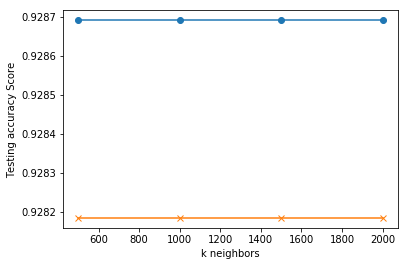

In [19]:
plt.plot(range(a, b, 500), train_scores, marker='o')
plt.plot(range(a, b, 500), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [20]:
# Note that k: XXXX seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=2000)
knn.fit(X_train, y_train)
print('k=2000 Test Acc: %.3f' % knn.score(X_test, y_test))

k=2000 Test Acc: 0.928


In [21]:
predictions = knn.predict(X_test)

In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     11975
           1       0.93      1.00      0.96    154771

   micro avg       0.93      0.93      0.93    166746
   macro avg       0.46      0.50      0.48    166746
weighted avg       0.86      0.93      0.89    166746



/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [23]:
df4 = pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)

In [24]:
df4.head(50)

Prediction  Actual
0            1       1
1            1       0
2            1       1
3            1       1
4            1       1
5            1       1
6            1       1
7            1       1
8            1       0
9            1       1
10           1       1
11           1       1
12           1       1
13           1       1
14           1       1
15           1       1
16           1       0
17           1       1
18           1       0
19           1       1
20           1       0
21           1       1
22           1       1
23           1       1
24           1       0
25           1       1
26           1       1
27           1       1
28           1       1
29           1       1
30           1       1
31           1       1
32           1       1
33           1       1
34           1       1
35           1       1
36           1       1
37           1       1
38           1       1
39           1       1
40           1       1
41           1       1
42           1       1
43           1       1
44           1       1
45           1       1
46           1       1
47           1       1
48           1       1
49           1       1

# Passing Real Time Feature Data for Testing on the Model.

In [25]:
myDF1.set_index("Activity_Feature_Name", inplace=True)
myDF2.set_index("Sector_Feature_Name", inplace=True)
myDF3.set_index("Country_Feature_Name", inplace=True)

print (myDF1.head())
print ("------------"*5)
print (myDF2.head())
print ("------------"*5)
print (myDF3.head())

                           Activity_Coefficients
Activity_Feature_Name                           
activity_Adult Care                       0.0798
activity_Agriculture                     -0.5987
activity_Air Conditioning                -0.0285
activity_Animal Sales                    -0.2070
activity_Aquaculture                     -0.5387
------------------------------------------------------------
                     Sector_Coefficients
Sector_Feature_Name                     
sector_Agriculture               -0.1947
sector_Arts                       1.3756
sector_Clothing                  -0.3865
sector_Construction               0.1980
sector_Education                  0.9738
------------------------------------------------------------
                      Country_Coefficients
Country_Feature_Name                      
country_Afghanistan                 0.0847
country_Albania                    -0.9845
country_Armenia                    -1.6796
country_Azerbaijan               

In [26]:
# Collecting / Inputing new data for testing status
input_country = "country_" + "India"
input_activity = "activity_" + "Agriculture"
input_sector = "sector_" + "Agriculture"
input_gender = "1" # if male 1, female 0 

print (input_country +"  " + input_activity + "  " + input_sector )


# Collecting the coeficients for the categorical inputs country, activity and sector

inputs = {'gender_male' :    input_gender, 
          'activity_coef' :  myDF1.loc[input_activity], 
          'sector_coef':     myDF2.loc[input_sector],
          'country_coef' :   myDF3.loc[input_country]
         }

# Replacing the new input data in the model format for testing

test = pd.Series(index=df2.columns)
for key in inputs.keys():
    test[key] = inputs[key]
    
test.fillna(0, inplace=True)

country_India  activity_Agriculture  sector_Agriculture


In [27]:
test1 = test.drop(['status'])

In [28]:
predictions = knn.predict_proba(test1.values.reshape(1, -1))
print (predictions)

[[0.004 0.996]]


# Saving a Trained Model

We can save our trained models using the HDF5 binary format with the extension .h5

https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/

You can use the pickle operation to serialize your machine learning algorithms and save the serialized format to a file.

Later you can load this file to deserialize your model and use it to make new predictions.


Finalize Your Model with joblib

Joblib is part of the SciPy ecosystem and provides utilities for pipelining Python jobs.

It provides utilities for saving and loading Python objects that make use of NumPy data structures, efficiently.

This can be useful for some machine learning algorithms that require a lot of parameters or store the entire dataset (like K-Nearest Neighbors).

In [29]:
# Save the model
import pickle
from sklearn.externals import joblib

filename = 'ML-Model-Set2-4-KNN-model-trained.h5'

joblib.dump(knn, filename)

['ML-Model-Set2-4-KNN-model-trained.h5']

In [30]:
# # load the model from disk
# loaded_model = joblib.load(filename)
# result = loaded_model.score(X_test, Y_test)
# print(result)